In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from skimage.io import imread, imshow, show
from skimage.transform import rescale
import numpy as np
%matplotlib inline

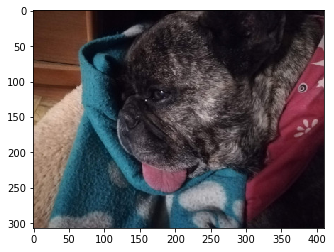

In [2]:
im = Image.open("dog.jpg")
plt.imshow(im)

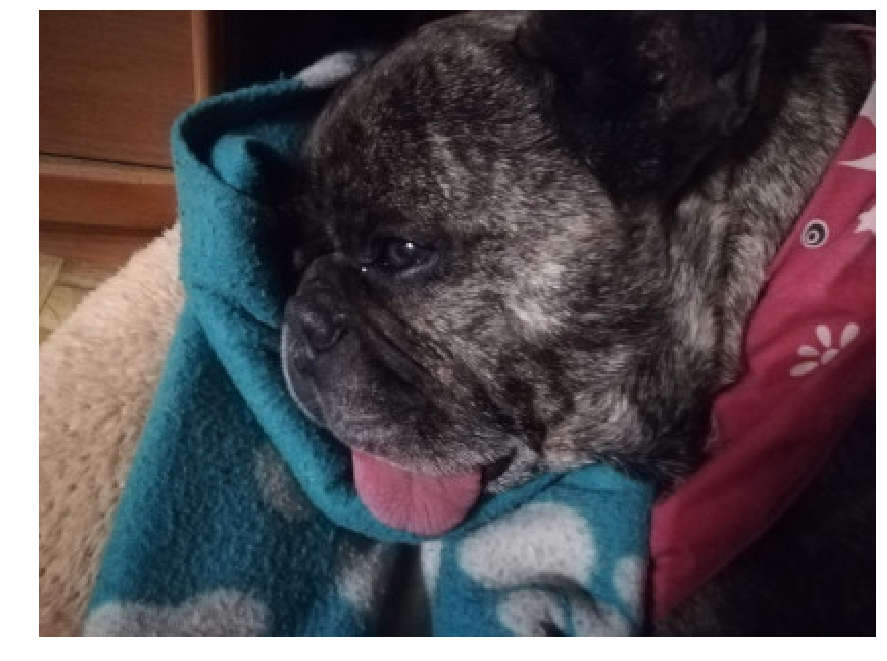

In [3]:
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) 
plt.figure(figsize=(15,15))
plt.axis("OFF")
plt.imshow(im1)
# plt.savefig("nearest.jpg")

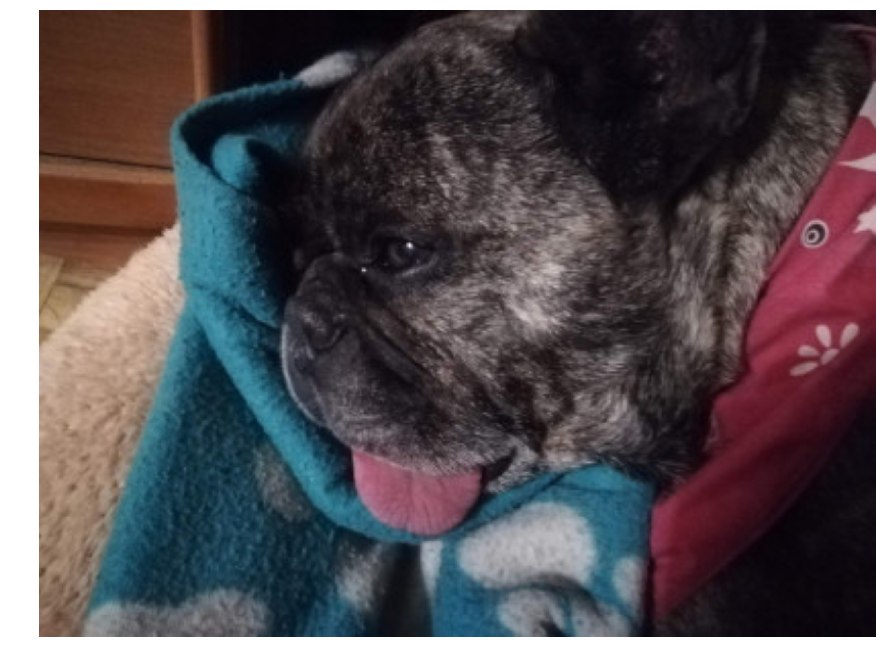

In [11]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) 
plt.figure(figsize=(15,15))
plt.axis("OFF")
plt.imshow(im1)

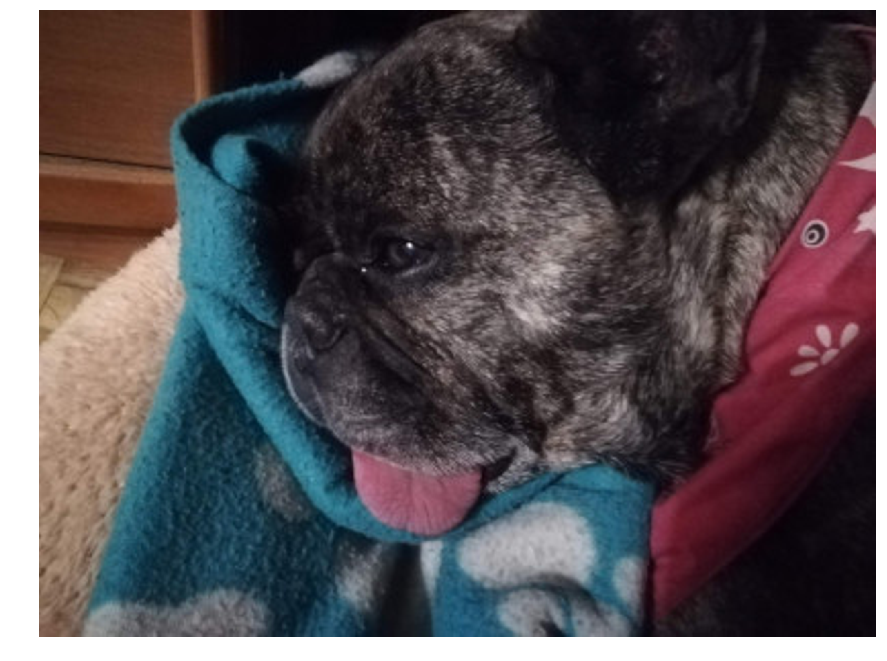

In [5]:
im1 = im.resize((im.width*5, im.height*5), Image.BICUBIC) 
plt.figure(figsize=(15,15))
plt.axis("OFF")
plt.imshow(im1)

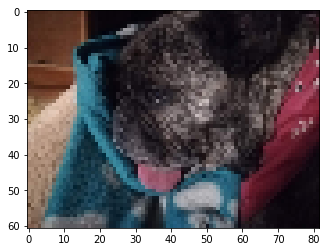

In [6]:
im1 = im.resize((im.width//5, im.height//5)) 
# plt.figure(figsize=(10,10))
plt.imshow(im1)

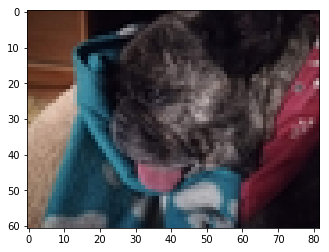

In [7]:
im1 = im.resize((im.width//5, im.height//5), Image.ANTIALIAS) 
# plt.figure(figsize=(10,10))
plt.imshow(im1)

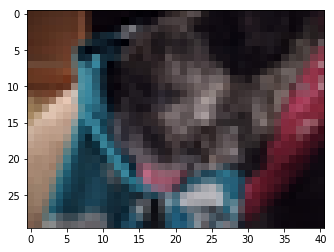

In [8]:
im1 = im.resize((im.width//10, im.height//10), Image.ANTIALIAS) 
# plt.figure(figsize=(10,10))
plt.imshow(im1)

TypeError: rescale() got an unexpected keyword argument 'multichannel'

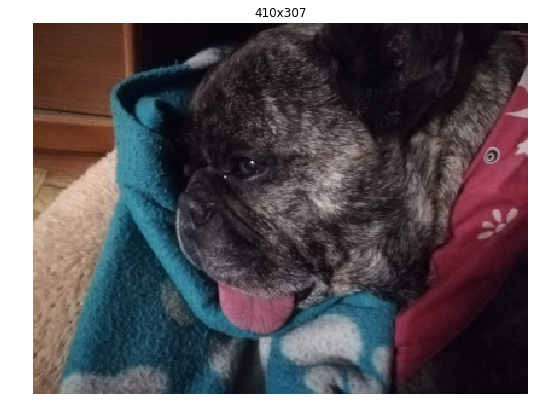

In [9]:
im = imread("dog.jpg")
im1 = im.copy()
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(im1)
    plt.title('{}x{}'.format(im1.shape[1],im1.shape[0]))
    plt.axis('off')
    im1 = rescale(im1, multichannel=True,scale=0.5)
plt.show()

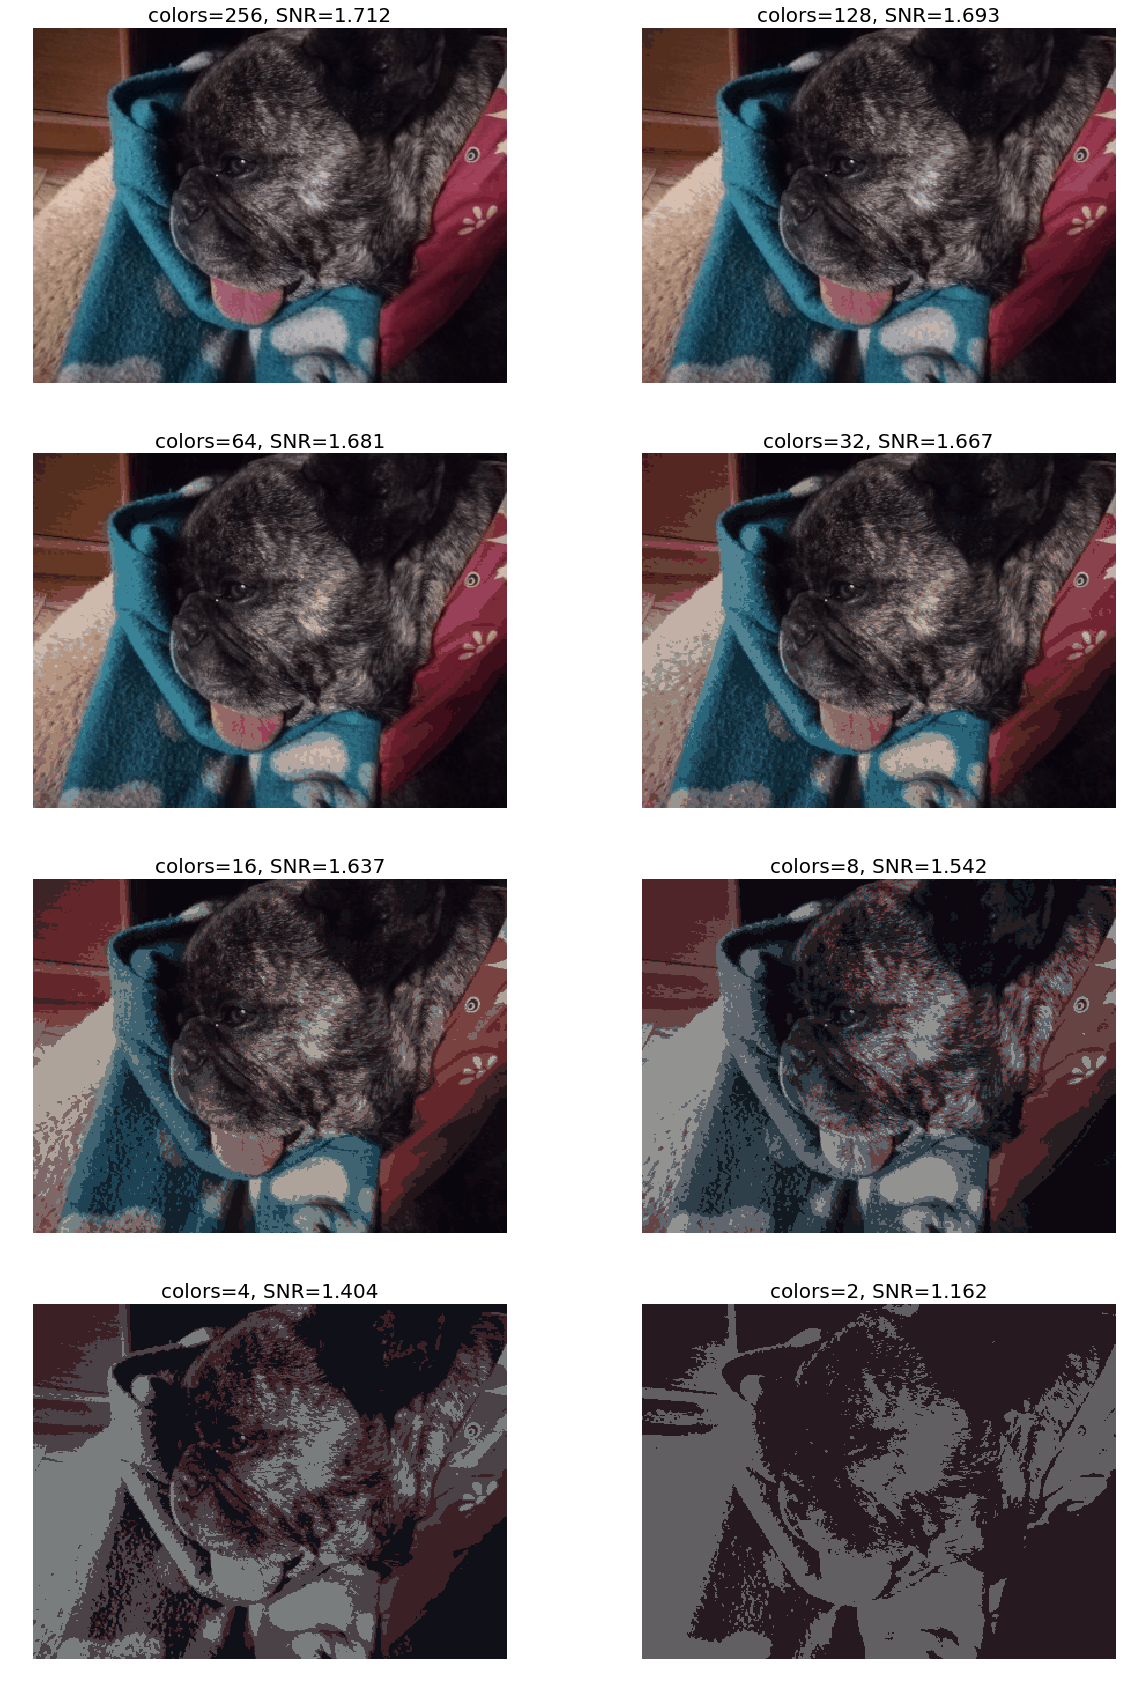

In [10]:
im = Image.open("dog.jpg")
plt.figure(figsize=(20,30))
num_colors_list = [2**n for n in range(8,0,-1)]
snr_list = []

for i, num_colors in enumerate(num_colors_list, 1):
    #P mode = 8 bits color
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    plt.subplot(4,2,i)
    plt.imshow(im1) 
    plt.axis('off')
    #signal to nois
    snr_list.append(np.mean(im1) / np.std(im1))
    plt.title("colors={}, SNR={}".format(num_colors, np.round(snr_list[i-1],3)), size=20)
    
# plt.subplots_adjust(wspace=0.2, hspace=0)
plt.show()